In [19]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Connect to my database
# Database connection parameters
conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [20]:
# Query for Washington offensive stats along with weather, altitude, and distance
query = """
SELECT date, raw_location, opponent, result,
       passing_cmp, passing_att, completion_pct, passing_yds, passing_td, 
       rushing_att, rushing_yds, rushing_avg, rushing_td, total_plays, total_yards, avg_yds,
       pass_first_downs, rush_first_downs, first_down_pens, total_first_downs, 
       total_penalties, total_penalties_yds, total_fum, total_int, total_to,
       temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Offensive_Stats;
"""

uw_data = pd.read_sql(query, conn)


uw_data.head()

,date,raw_location,opponent,result,passing_cmp,passing_att,completion_pct,passing_yds,passing_td,rushing_att,...,total_penalties,total_penalties_yds,total_fum,total_int,total_to,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2021-09-18,H,Arkansas State,W (52-3),25,44,56.8,398,3,39,...,6,57,1,2,3,56.3,0.203,14.9,53.0,0.00
1,2023-09-02,H,Boise State,W (56-19),31,42,73.8,490,6,19,...,5,60,0,0,0,65.7,0.000,5.8,53.0,0.00
2,2023-09-09,H,Tulsa,W (43-10),30,40,75.0,454,3,22,...,7,93,1,1,2,67.7,0.000,10.2,53.0,0.00
3,2023-09-16,@,Michigan State,W (41-7),29,39,74.4,536,4,33,...,11,110,0,1,1,61.4,0.000,8.9,262.0,1859.35
4,2023-09-23,H,California,W (59-32),23,32,71.9,389,4,30,...,9,83,0,1,1,56.3,0.000,17.1,53.0,0.00


In [21]:
# distance ranges
bins = [0, 500, 1000, 1500, 4000]
labels = ['<500', '500-1000', '1000-1500', '1500+']

# new column for distance categories
uw_data['Distance_Range'] = pd.cut(uw_data['distance_from'], bins=bins, labels=labels, right=False)


distance_grouped = uw_data.groupby('Distance_Range').agg({
    'passing_yds': 'mean',
    'rushing_yds': 'mean',
    'total_yards': 'mean',
    'completion_pct': 'mean',
    'passing_td': 'mean',
    'rushing_att': 'mean',
    'passing_att': 'mean',   
    'rushing_td': 'mean',
    'total_first_downs': 'mean',
    'total_to': 'mean'
}).reset_index()


distance_grouped.head()


,Distance_Range,passing_yds,rushing_yds,total_yards,completion_pct,passing_td,rushing_att,passing_att,rushing_td,total_first_downs,total_to
0,<500,260.068182,177.920455,437.988636,65.787500,2.022727,37.056818,31.090909,2.329545,22.147727,1.215909
1,500-1000,244.642857,153.464286,398.107143,62.903571,1.857143,36.642857,32.785714,1.500000,21.428571,1.178571
2,1000-1500,259.500000,146.600000,406.100000,61.500000,1.100000,36.800000,35.100000,2.200000,21.700000,1.400000
3,1500+,295.500000,134.166667,429.666667,60.933333,1.500000,33.166667,37.083333,1.250000,21.666667,1.250000


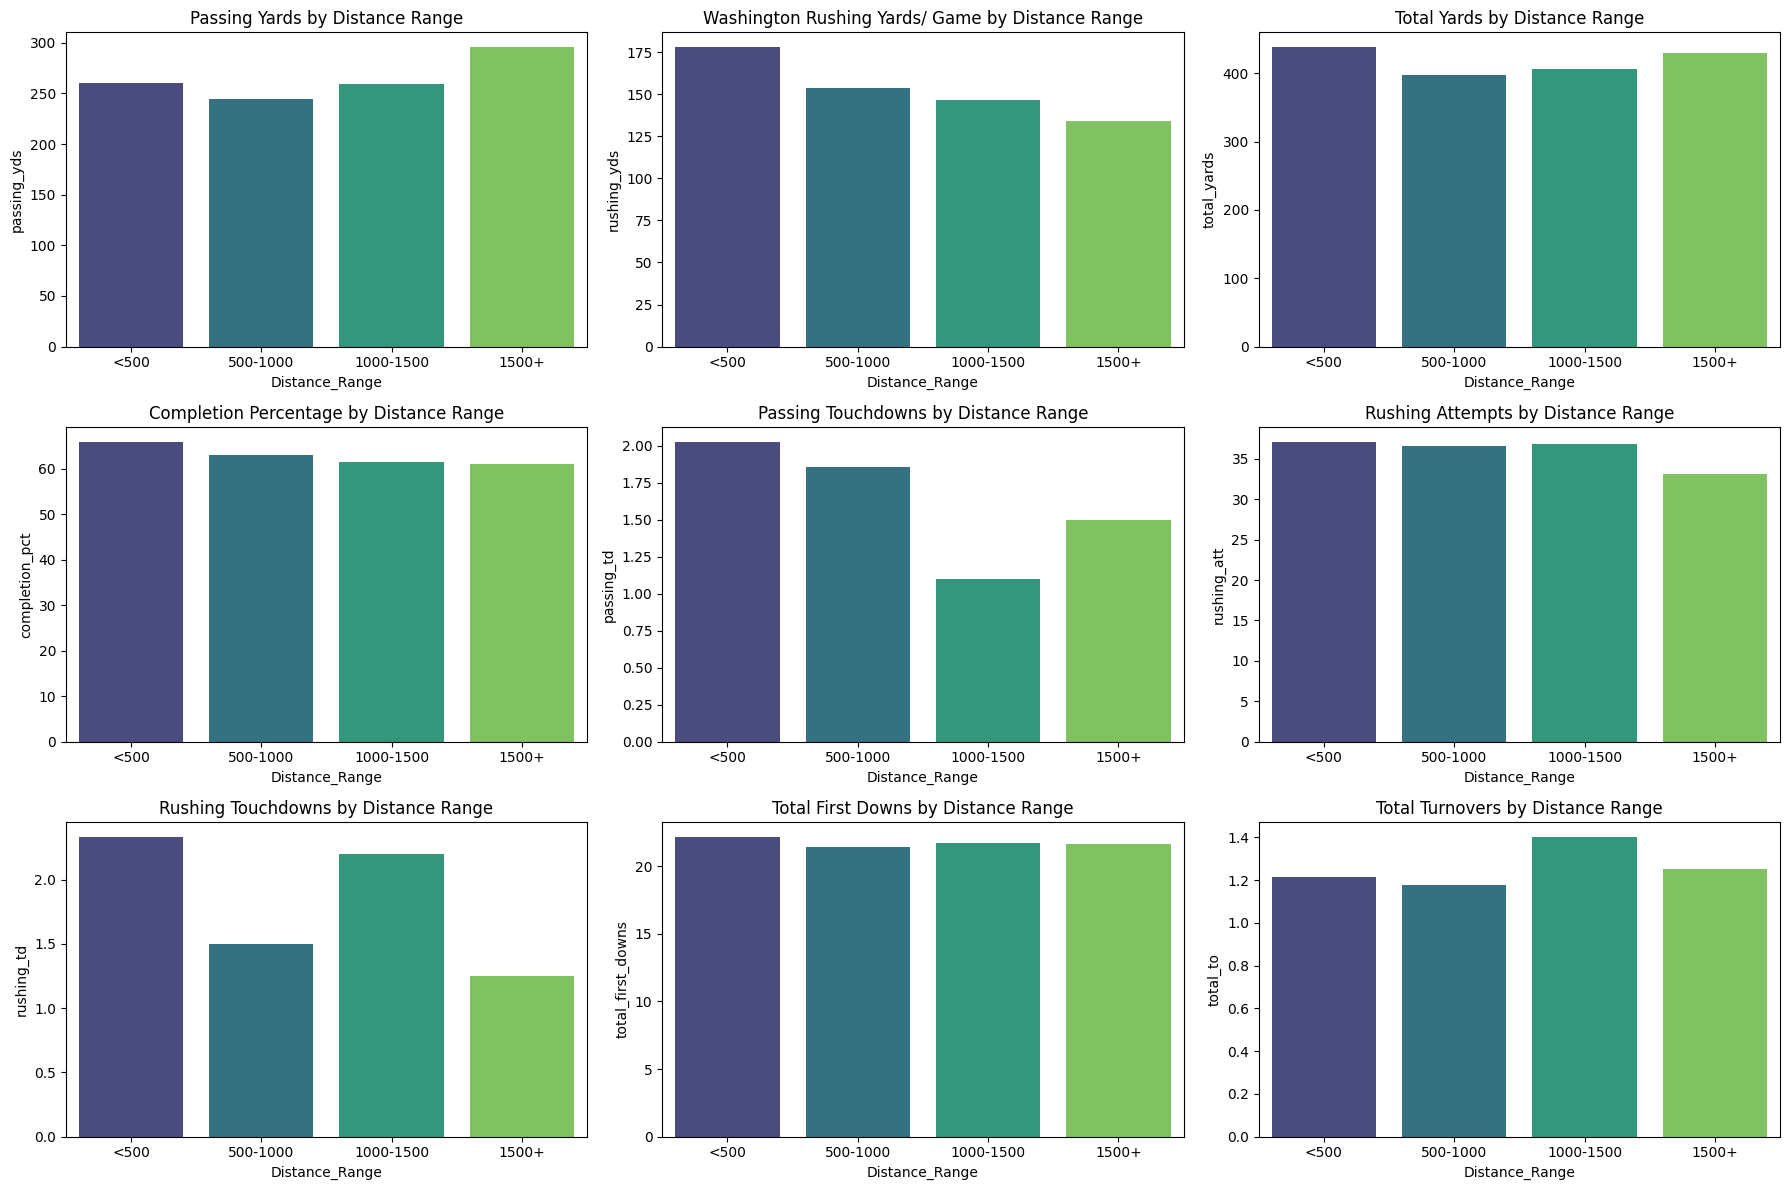

In [25]:
fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Passing Yards
sns.barplot(x='Distance_Range', y='passing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 0], legend=False)
axs[0, 0].set_title('Passing Yards by Distance Range')

# Rushing Yards
sns.barplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 1], legend=False)
axs[0, 1].set_title('Washington Rushing Yards/ Game by Distance Range')

# Total Yards
sns.barplot(x='Distance_Range', y='total_yards', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[0, 2], legend=False)
axs[0, 2].set_title('Total Yards by Distance Range')

# Completion Percentage
sns.barplot(x='Distance_Range', y='completion_pct', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 0], legend=False)
axs[1, 0].set_title('Completion Percentage by Distance Range')

# Passing Touchdowns
sns.barplot(x='Distance_Range', y='passing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 1], legend=False)
axs[1, 1].set_title('Passing Touchdowns by Distance Range')

# Rushing Attempts
sns.barplot(x='Distance_Range', y='rushing_att', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[1, 2], legend=False)
axs[1, 2].set_title('Rushing Attempts by Distance Range')

# Rushing Touchdowns
sns.barplot(x='Distance_Range', y='rushing_td', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 0], legend=False)
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')

# Total First Downs
sns.barplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 1], legend=False)
axs[2, 1].set_title('Total First Downs by Distance Range')

# Total Turnovers
sns.barplot(x='Distance_Range', y='total_to', data=distance_grouped, hue='Distance_Range', palette='viridis', ax=axs[2, 2], legend=False)
axs[2, 2].set_title('Total Turnovers by Distance Range')


plt.tight_layout()
plt.show()



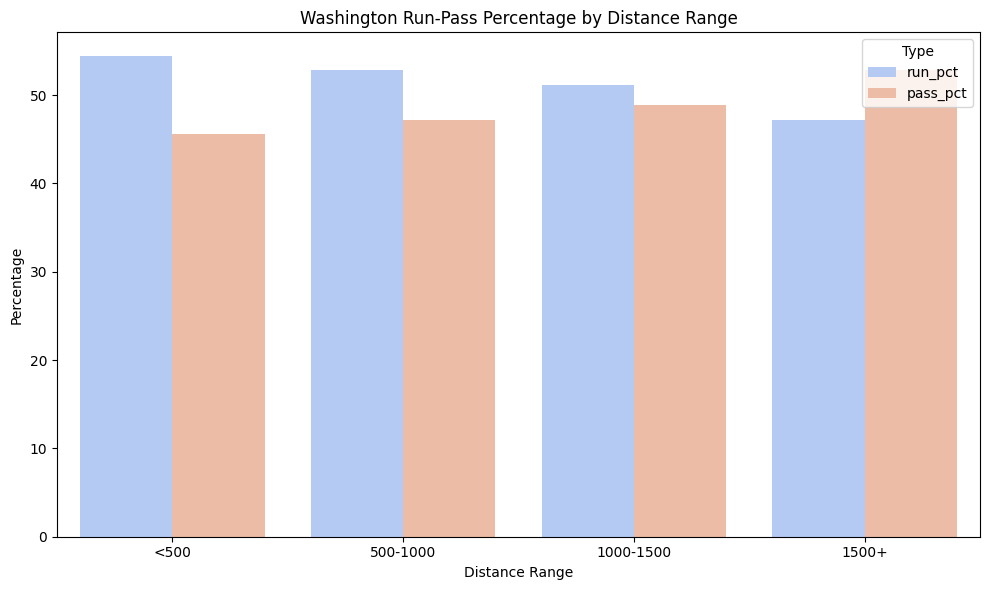

In [23]:
# Run-Pass Percentage
distance_grouped['run_pct'] = distance_grouped['rushing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100
distance_grouped['pass_pct'] = distance_grouped['passing_att'] / (distance_grouped['rushing_att'] + distance_grouped['passing_att']) * 100


fig, ax = plt.subplots(figsize=(10, 6))

# Plot Run and Pass Percentages side by side
distance_grouped_melted = pd.melt(distance_grouped, id_vars=['Distance_Range'], value_vars=['run_pct', 'pass_pct'], var_name='Type', value_name='Percentage')

sns.barplot(x='Distance_Range', y='Percentage', hue='Type', data=distance_grouped_melted, palette='coolwarm')

# Add titles and labels
ax.set_title('Washington Run-Pass Percentage by Distance Range')
ax.set_ylabel('Percentage')
ax.set_xlabel('Distance Range')


plt.tight_layout()
plt.show()

In [16]:

distance_bins = [0, 500, 1000, 1500, float('inf')]
distance_labels = ['<500 miles', '500-1000 miles', '1000-1500 miles', '1500+ miles']

uw_data['Distance_Range'] = pd.cut(uw_data['distance_from'], bins=distance_bins, labels=distance_labels)


uw_data['win'] = uw_data['result'].apply(lambda x: 1 if x.strip()[0] == 'W' else 0)


distance_grouped = uw_data.groupby('Distance_Range').agg(
    total_games=('win', 'count'),
    total_wins=('win', 'sum')
)


distance_grouped['win_percentage'] = (distance_grouped['total_wins'] / distance_grouped['total_games']) * 100


print(distance_grouped)


                 total_games  total_wins  win_percentage
Distance_Range                                          
<500 miles                15          11       73.333333
500-1000 miles            28          18       64.285714
1000-1500 miles           10           4       40.000000
1500+ miles               12           7       58.333333


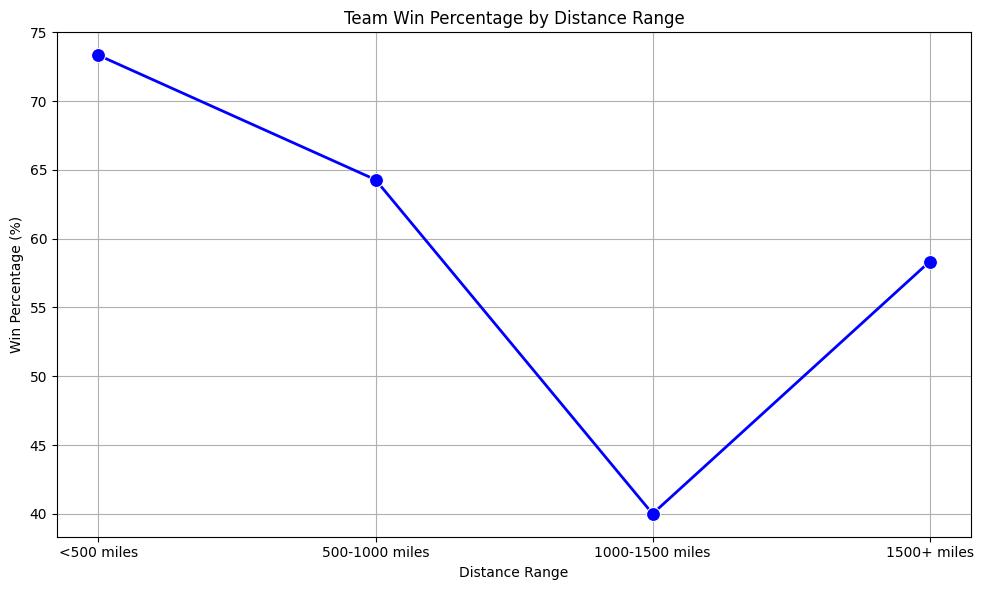

In [17]:

distance_grouped.reset_index(inplace=True)  


plt.figure(figsize=(10, 6))
sns.lineplot(x='Distance_Range', y='win_percentage', data=distance_grouped, marker='o', linewidth=2, markersize=10, color='b')


plt.xlabel('Distance Range')
plt.ylabel('Win Percentage (%)')
plt.title('Team Win Percentage by Distance Range')


plt.grid(True)
plt.tight_layout()
plt.show()


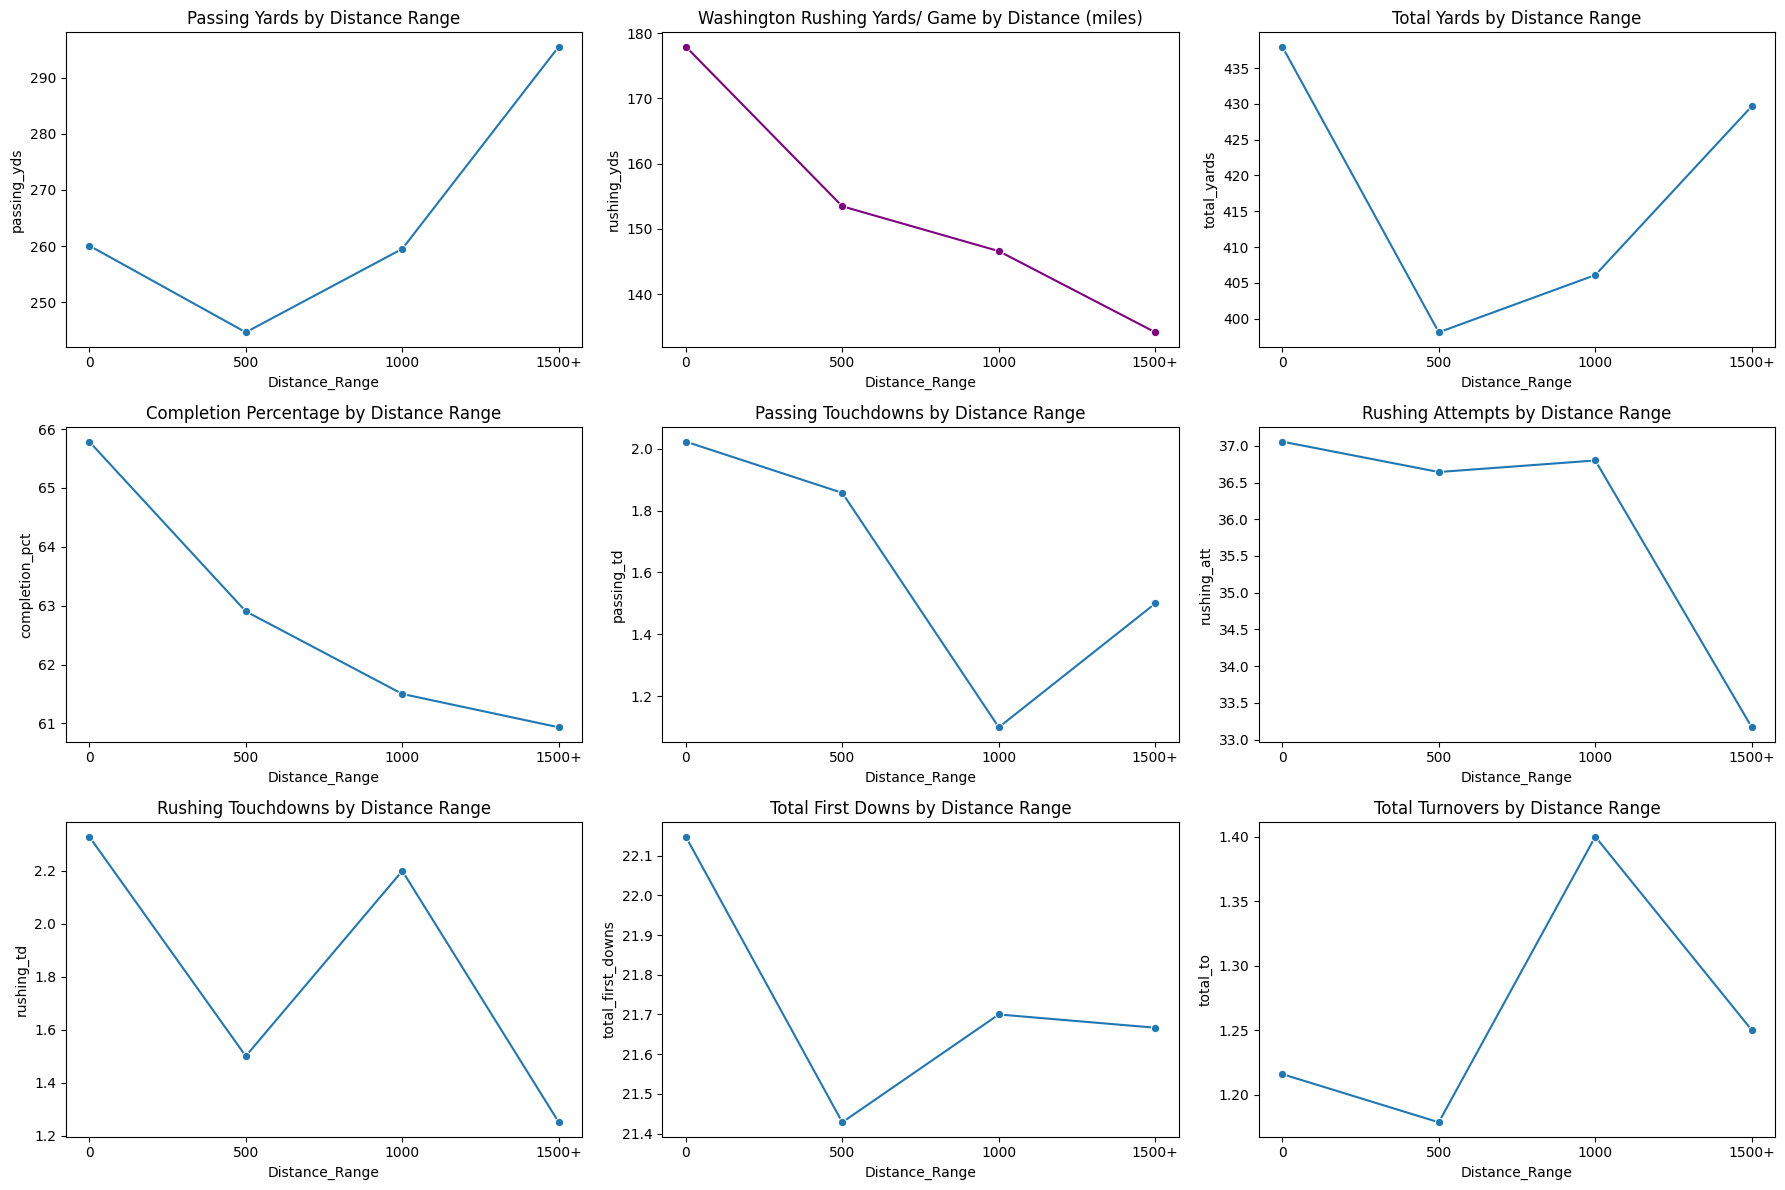

In [33]:

fig, axs = plt.subplots(3, 3, figsize=(18, 12))

# Define new labels for the Distance Range
distance_labels = ['0', '500', '1000', '1500+']

# Passing Yards
sns.lineplot(x='Distance_Range', y='passing_yds', data=distance_grouped, marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Passing Yards by Distance Range')
axs[0, 0].set_xticklabels(distance_labels)

# Rushing Yards
sns.lineplot(x='Distance_Range', y='rushing_yds', data=distance_grouped, marker='o', ax=axs[0, 1], color = 'purple')
axs[0, 1].set_title('Washington Rushing Yards/ Game by Distance (miles)')
axs[0, 1].set_xticklabels(distance_labels)

# Total Yards
sns.lineplot(x='Distance_Range', y='total_yards', data=distance_grouped, marker='o', ax=axs[0, 2])
axs[0, 2].set_title('Total Yards by Distance Range')
axs[0, 2].set_xticklabels(distance_labels)

# Completion Percentage
sns.lineplot(x='Distance_Range', y='completion_pct', data=distance_grouped, marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Completion Percentage by Distance Range')
axs[1, 0].set_xticklabels(distance_labels)

# Passing Touchdowns
sns.lineplot(x='Distance_Range', y='passing_td', data=distance_grouped, marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Passing Touchdowns by Distance Range')
axs[1, 1].set_xticklabels(distance_labels)

# Rushing Attempts
sns.lineplot(x='Distance_Range', y='rushing_att', data=distance_grouped, marker='o', ax=axs[1, 2])
axs[1, 2].set_title('Rushing Attempts by Distance Range')
axs[1, 2].set_xticklabels(distance_labels)

# Rushing Touchdowns
sns.lineplot(x='Distance_Range', y='rushing_td', data=distance_grouped, marker='o', ax=axs[2, 0])
axs[2, 0].set_title('Rushing Touchdowns by Distance Range')
axs[2, 0].set_xticklabels(distance_labels)

# Total First Downs
sns.lineplot(x='Distance_Range', y='total_first_downs', data=distance_grouped, marker='o', ax=axs[2, 1])
axs[2, 1].set_title('Total First Downs by Distance Range')
axs[2, 1].set_xticklabels(distance_labels)

# Total Turnovers
sns.lineplot(x='Distance_Range', y='total_to', data=distance_grouped, marker='o', ax=axs[2, 2])
axs[2, 2].set_title('Total Turnovers by Distance Range')
axs[2, 2].set_xticklabels(distance_labels)


plt.tight_layout()
plt.show()
